In [1]:
#Current Working Directory
getwd()

[1] "C:/Users/User"

In [2]:
#importing required library
library("xlsx")
library("ggplot2")
library("dplyr")
library("Hmisc")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units



In [3]:
#importing training data into R.
df <- read.xlsx('./training.xlsx',sheetIndex = 1)
summary(df)

    Credit.Application.Result     Account.Balance Duration.of.Credit.Month
 Creditworthy    :358         No Account  :262    Min.   : 4.00           
 Non-Creditworthy:142         Some Balance:238    1st Qu.:12.00           
                                                  Median :18.00           
                                                  Mean   :21.43           
                                                  3rd Qu.:24.00           
                                                  Max.   :60.00           
                                                                          
          Payment.Status.of.Previous.Credit         Purpose    Credit.Amount  
 No Problems (in this bank):204             Home Related:355   Min.   :  276  
 Paid Up                   :260             New car     : 47   1st Qu.: 1357  
 Some Problems             : 36             Other       : 15   Median : 2236  
                                            Used car    : 83   Mean   : 3200  
     

In [4]:
#sum of column and drop unwanted data
colSums(is.na(df))
drop <- c("Duration.in.Current.address")
dd = select(df, -c("Duration.in.Current.address"))
colSums(is.na(dd))
dd$`Age.years`[is.na(dd$`Age.years`)] <- median(dd$`Age.years`, na.rm = TRUE)
drop <- c("Guarantors","Concurrent.Credits","Occupation","No.of.dependents","Foreign.Worker","Telephone")
data_clean = dd[,!(names(dd) %in% drop)]

Credit.Application.Result                   Account.Balance 
                                0                                 0 
         Duration.of.Credit.Month Payment.Status.of.Previous.Credit 
                                0                                 0 
                          Purpose                     Credit.Amount 
                                0                                 0 
             Value.Savings.Stocks      Length.of.current.employment 
                                0                                 0 
              Instalment.per.cent                        Guarantors 
                                0                                 0 
      Duration.in.Current.address     Most.valuable.available.asset 
                              344                                 0 
                        Age.years                Concurrent.Credits 
                               12                                 0 
                Type.of.apartment        No.of.Credits.at.this.Bank 
                                0                                 0 
                       Occupation                  No.of.dependents 
                                0                                 0 
                        Telephone                    Foreign.Worker 
                                0                                 0

Credit.Application.Result                   Account.Balance 
                                0                                 0 
         Duration.of.Credit.Month Payment.Status.of.Previous.Credit 
                                0                                 0 
                          Purpose                     Credit.Amount 
                                0                                 0 
             Value.Savings.Stocks      Length.of.current.employment 
                                0                                 0 
              Instalment.per.cent                        Guarantors 
                                0                                 0 
    Most.valuable.available.asset                         Age.years 
                                0                                12 
               Concurrent.Credits                 Type.of.apartment 
                                0                                 0 
       No.of.Credits.at.this.Bank                        Occupation 
                                0                                 0 
                 No.of.dependents                         Telephone 
                                0                                 0 
                   Foreign.Worker 
                                0

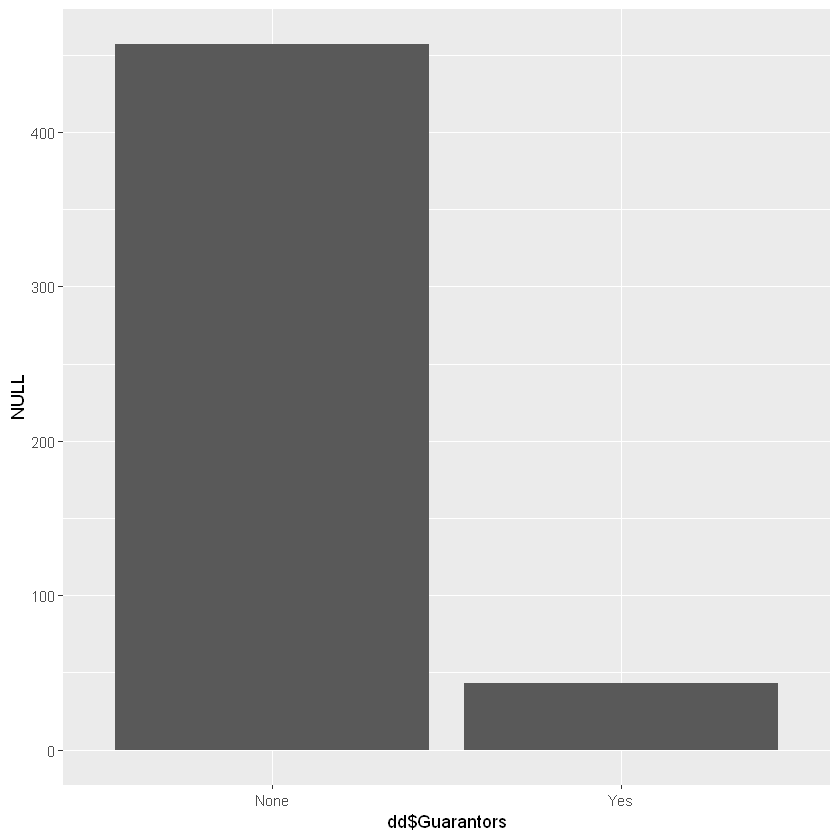

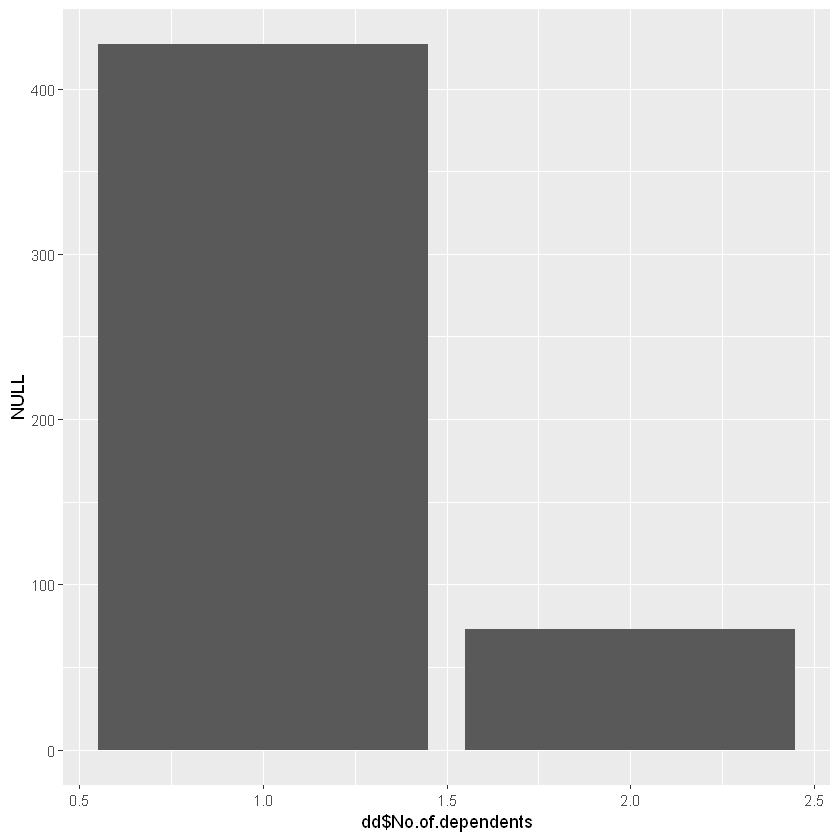

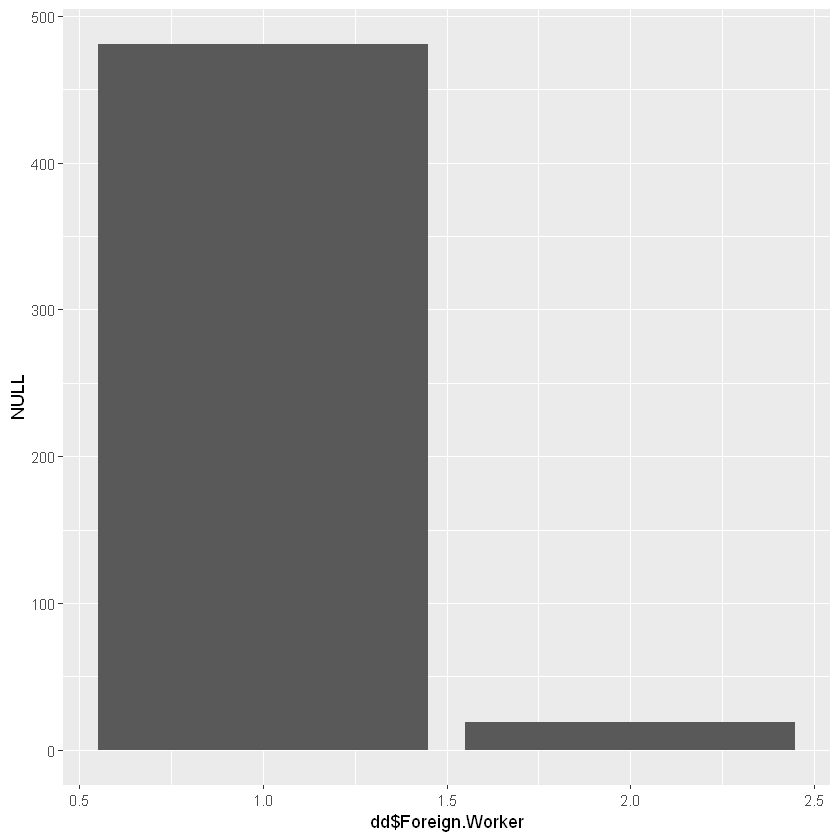

In [5]:
#data is skewed towards none
qplot(dd$`Guarantors`, geom="bar")
qplot(dd$`No.of.dependents`, geom="bar") 
qplot(dd$`Foreign.Worker`, geom="bar") 

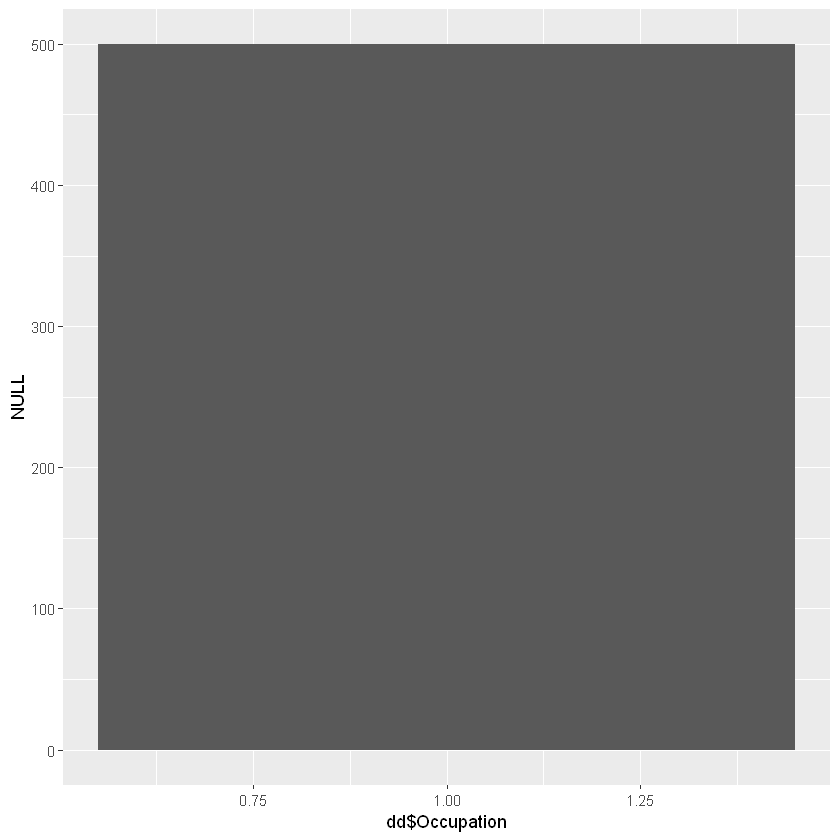

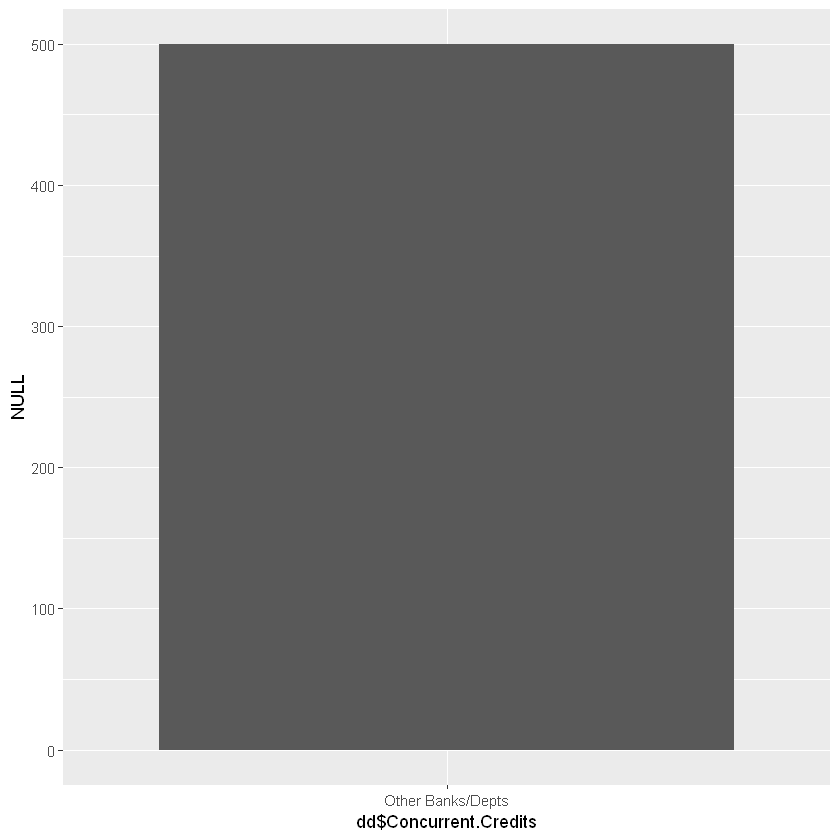

In [6]:
#uniform data
qplot(dd$`Occupation`, geom="bar") 
qplot(dd$`Concurrent.Credits`, geom="bar") 

In [7]:
#after cleaing remain attributes.
attributes(data_clean)
sapply(data_clean, class)

$names
 [1] "Credit.Application.Result"         "Account.Balance"                  
 [3] "Duration.of.Credit.Month"          "Payment.Status.of.Previous.Credit"
 [5] "Purpose"                           "Credit.Amount"                    
 [7] "Value.Savings.Stocks"              "Length.of.current.employment"     
 [9] "Instalment.per.cent"               "Most.valuable.available.asset"    
[11] "Age.years"                         "Type.of.apartment"                
[13] "No.of.Credits.at.this.Bank"       

$class
[1] "data.frame"

$row.names
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
[109] 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
[127] 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
[145] 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
[163] 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
[181] 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
[199] 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
[217] 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
[235] 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
[253] 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
[271] 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
[289] 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
[307] 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324
[325] 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342
[343] 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360
[361] 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378
[379] 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396
[397] 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414
[415] 415 416 417 418 419 420 421 422 423 424 425 426 427 428 429 430 431 432
[433] 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450
[451] 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468
[469] 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486
[487] 487 488 489 490 491 492 493 494 495 496 497 498 499 500

Credit.Application.Result                   Account.Balance 
                         "factor"                          "factor" 
         Duration.of.Credit.Month Payment.Status.of.Previous.Credit 
                        "numeric"                          "factor" 
                          Purpose                     Credit.Amount 
                         "factor"                         "numeric" 
             Value.Savings.Stocks      Length.of.current.employment 
                         "factor"                          "factor" 
              Instalment.per.cent     Most.valuable.available.asset 
                        "numeric"                         "numeric" 
                        Age.years                 Type.of.apartment 
                        "numeric"                         "numeric" 
       No.of.Credits.at.this.Bank 
                         "factor"

In [8]:
#generalization of linear model
model <- glm(Credit.Application.Result~.,family=binomial(link='logit'),data=data_clean)
summary(model)


Call:
glm(formula = Credit.Application.Result ~ ., family = binomial(link = "logit"), 
    data = data_clean)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4176  -0.7255  -0.4750   0.7376   2.6211  

Coefficients:
                                                 Estimate Std. Error z value
(Intercept)                                    -2.826e+00  7.940e-01  -3.558
Account.BalanceSome Balance                    -1.289e+00  2.535e-01  -5.083
Duration.of.Credit.Month                        1.213e-02  1.126e-02   1.077
Payment.Status.of.Previous.CreditPaid Up        5.510e-01  3.205e-01   1.719
Payment.Status.of.Previous.CreditSome Problems  1.720e+00  4.613e-01   3.729
PurposeNew car                                 -1.328e+00  4.874e-01  -2.724
PurposeOther                                   -5.708e-01  7.669e-01  -0.744
PurposeUsed car                                -3.518e-01  3.244e-01  -1.085
Credit.Amount                                   1.447e-04  5.605e-0

In [9]:
# load testing data into R.
test <-read.xlsx('./customers-to-score.xlsx',sheetIndex = 1)
summary(test)

     Account.Balance Duration.of.Credit.Month
 No Account  :282    Min.   : 4.00           
 Some Balance:218    1st Qu.:12.00           
                     Median :18.00           
                     Mean   :20.25           
                     3rd Qu.:24.00           
                     Max.   :72.00           
          Payment.Status.of.Previous.Credit         Purpose    Credit.Amount  
 No Problems (in this bank):176             Home Related:354   Min.   :  250  
 Paid Up                   :272             New car     : 52   1st Qu.: 1382  
 Some Problems             : 52             Used car    : 94   Median : 2370  
                                                               Mean   : 3300  
                                                               3rd Qu.: 3968  
                                                               Max.   :15945  
   Value.Savings.Stocks Length.of.current.employment Instalment.per.cent
 < Â£100     : 55       < 1yr  :291                 

In [10]:
#Prediction 
res<-predict(model,test,type="response")
res

1          2          3          4          5          6          7 
0.28994477 0.33129861 0.38395514 0.32930919 0.12637452 0.20577082 0.35663737 
         8          9         10         11         12         13         14 
0.16165172 0.71096120 0.17642483 0.19356530 0.08834740 0.35265575 0.33479790 
        15         16         17         18         19         20         21 
0.23636710 0.11062748 0.13432625 0.03073540 0.39489478 0.39464263 0.11344832 
        22         23         24         25         26         27         28 
0.15336449 0.21265269 0.02270975 0.05786774 0.05766039 0.45869571 0.05644424 
        29         30         31         32         33         34         35 
0.34917804 0.35337144 0.03855685 0.18034325 0.17445641 0.37638596 0.19280544 
        36         37         38         39         40         41         42 
0.45081884 0.13247823 0.10975514 0.47551297 0.01774630 0.24147701 0.36768120 
        43         44         45         46         47         48         49 
0.10049360 0.33280423 0.06814202 0.51067188 0.40926392 0.14399759 0.28122115 
        50         51         52         53         54         55         56 
0.54296515 0.18706991 0.12423573 0.39684566 0.03828049 0.15467842 0.77443120 
        57         58         59         60         61         62         63 
0.05651601 0.09242093 0.10648574 0.15798789 0.12687624 0.08340164 0.04157265 
        64         65         66         67         68         69         70 
0.34631096 0.02772210 0.16853698 0.12518277 0.08182834 0.22994547 0.22794131 
        71         72         73         74         75         76         77 
0.57625379 0.91392675 0.24146055 0.16314974 0.08593416 0.21823627 0.21673754 
        78         79         80         81         82         83         84 
0.09400751 0.15896098 0.18105037 0.05259304 0.18287198 0.26254094 0.09413254 
        85         86         87         88         89         90         91 
0.83648031 0.23274576 0.12025374 0.12304832 0.09449231 0.36675816 0.13877197 
        92         93         94         95         96         97         98 
0.20240083 0.19803700 0.31982271 0.15484713 0.36802555 0.10187003 0.58309098 
        99        100        101        102        103        104        105 
0.04633639 0.08948169 0.80450120 0.03948436 0.37564932 0.19530342 0.09205498 
       106        107        108        109        110        111        112 
0.40036328 0.31201220 0.23610844 0.49725185 0.05904822 0.05201807 0.43477154 
       113        114        115        116        117        118        119 
0.11088024 0.07214033 0.15642281 0.02467412 0.28332239 0.04005857 0.35210850 
       120        121        122        123        124        125        126 
0.19175044 0.20708811 0.05723784 0.03944888 0.15580149 0.11857273 0.32981032 
       127        128        129        130        131        132        133 
0.30530312 0.06804509 0.33164673 0.25349051 0.23371050 0.54412195 0.03896167 
       134        135        136        137        138        139        140 
0.07397301 0.09807657 0.03597078 0.26910165 0.06648364 0.19959546 0.08529611 
       141        142        143        144        145        146        147 
0.14613017 0.07298272 0.06304680 0.03224957 0.10273380 0.24644090 0.04289812 
       148        149        150        151        152        153        154 
0.12742172 0.59145306 0.26390001 0.03451638 0.32995074 0.35982197 0.26014900 
       155        156        157        158        159        160        161 
0.37827133 0.14025954 0.11116597 0.12611338 0.07672846 0.04452817 0.07742760 
       162        163        164        165        166        167        168 
0.23618322 0.04873305 0.12574589 0.21344493 0.01511523 0.01097904 0.02514184 
       169        170        171        172        173        174        175 
0.06442766 0.11015011 0.11618445 0.14133054 0.05482634 0.08502994 0.25545703 
       176        177        178        179        180        181        182 
0.38503106 0.26424241 0.0846944

In [11]:
#Confusion Matrix
confmatrix<- table(Actual_Value=data_clean$Credit.Application.Result, Predicted_Value=res>0.72)
confmatrix

                  Predicted_Value
Actual_Value       FALSE TRUE
  Creditworthy       342   16
  Non-Creditworthy   133    9

In [13]:
#Accuracy 
(confmatrix[[1,1]] + confmatrix[[2,2]])/sum(confmatrix)

[1] 0.702